# Ultimate Guide for Qiskit

### States, Measurements, & Operations 

#### Defining qubit wave functions / statevectors

The `Statevector` class provides functionality for defining and manipulating quantum statevectors/wave functions. 

In [3]:
import numpy as np
from qiskit.quantum_info import Statevector
from numpy import sqrt

u = Statevector([1/sqrt(2), 1/sqrt(2)])
v = Statevector([(1 + 2.0j)/3, -2/3])
w = Statevector([1/3, 2/3])

The `Statevector` class also provides a `draw` method for displaying statevectors in $\LaTeX$ format (and text if you want). 

We can check if these statevectors are valid using the `is_valid` method. 

Remember, as the norm of components squared $|c_i|^2$ of the statevector represent the probabilities to yield the eigenvalue for the basis we define the statevectors in -- the probabilities $|c_i|^2$ for each eigenvalue must sum to one: $$\sum_i |c_i|^2 = 1 $$ To put it simply, the Euclidean norm must equal 1. 

In [5]:
display(u.draw("latex"))
display(v.draw("latex"))

print(f"Statevector u is valid? {u.is_valid()}")
print(f"Statevector w is valid? {w.is_valid()}")

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Statevector u is valid? True
Statevector w is valid? False


##### Simulating measurements using `Statevector`

Using the `measure` method from the `Statevector` class is one way to measure quantum states in Qiskit. 

In [6]:
# creating qubit wave function & displaying it
v = Statevector([(1 + 2.0j)/3, -2/3])
display(v.draw("latex"))

# measuring
v.measure()

<IPython.core.display.Latex object>

('0',
 Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
             dims=(2,)))

Note that as measurement is probabilistic, measuring the above wave function could yield different results. 

Upon measuring the qubit collapses into either $|0\rangle$ or $|1\rangle$, since we have been using the computational basis $\{ |0\rangle, |1\rangle \}$ to define our statevectors thus far. 

`v.measure()` returns a `tuple` which stores info on the eigenvalue measured, the collapsed wave function, and the dimension of the wave function.

```python

v.measure()[0] # measured eigenvalue
v.measure()[1] # collapsed resultant wave function 
```

If we run many iterations of `v.measure()` we should yield a graph that comes close to the intrinsic probabilities of each eigenvalue.

# 0 | # 1
562 | 438


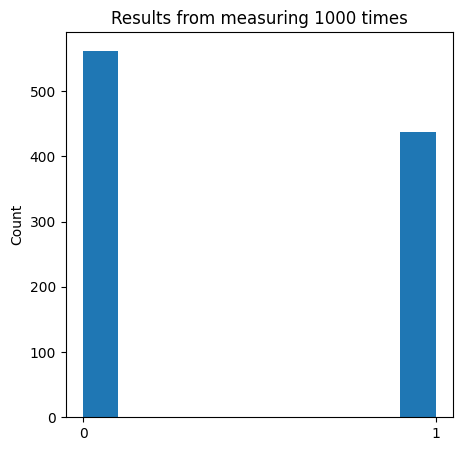

In [18]:
import matplotlib.pyplot as plt

results = np.empty([0])

num_runs = 1000

for i in range(num_runs): 
    results = np.append(results, v.measure()[0]) # storing resulting eigenvalues

num_0 = len(np.where(results == '0')[0]) # # measurements yielding 0
num_1 = len(np.where(results == '1')[0]) # # measurements yielding 1 

fig, axis = plt.subplots(1, 1, figsize = (5, 5))
plt.hist(results) 
plt.title(f"Results from measuring {num_runs} times")
plt.ylabel("Count")

print("{:>3} | {:>3}".format("# 0", "# 1"))
print("{:>3} | {:>3}".format(num_0, num_1))

Qiskit provides a way to visualize probabilities in a much *simpler* and *direct* way using the `plot_histogram` method in `qiskit.visualization`.

{'0': 572, '1': 428}


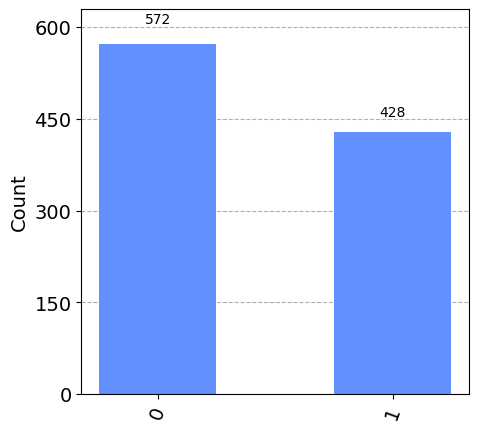

In [19]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000) # directly make 1000 measurements 
                                   # and store results in `statistics`
print(statistics) 
plot_histogram(statistics, figsize = (5, 5)) # makes histogram directly

We see the results are almost identical. If we took an infinite number of measurements and collected all the results, we would see the probabilities match with what's predicted from the wavefunction/statevector. 

By now you shold start to feel that Qiskit is just python. Of course, it is known Qiskit is just a python librray, however for many it seems like an entire new language. One just has to understand how to work with all the features of Qiskit *within* python. The first step is understanding all the quantum gates/operators. 

---

## Single-Qubit Quantum Gates / Operators

We start with the Pauli Operators that are used when measuring spins of elementary particles. Spin is one of the ways qubits are defined in real-life. (spin up $|\uparrow\rangle$ could mean $|0\rangle$ and spin down $|\downarrow\rangle$ could mean $|1\rangle$).

#### Pauli-X (NOT) Operator

The simplest logic gate is the Pauli-X / NOT operator. It inverts a value of a qubit from $0\rightarrow 1$ or $1\rightarrow0$, assuming we are in the computational basis. Its matrix representation is accordingly, 

$$ \hat{X} \equiv \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} $$ 

We can see its action on the following statevector $|0\rangle = v= \begin{pmatrix} 1 \\ 0 \end{pmatrix}$

In [21]:
from qiskit.quantum_info import Operator

X = Operator([[0, 1], [1, 0]]) # Pauli X Operator

v_initial = Statevector([1, 0]) # Statevector

print("Starting Statevector:")
display(v_initial.draw("latex"))

v_final = v_initial.evolve(X) # applies X on v_i

print("Post Pauli-X Operator:")
display(v_final.draw("latex"))

Starting Statevector:


<IPython.core.display.Latex object>

Post Pauli-X Operator:


<IPython.core.display.Latex object>

If we apply two X-gates in succession, we see the qubit flip back to its original state $|0\rangle$

In [22]:
v_intermediate = v_initial.evolve(X)
v_final = v_intermediate.evolve(X)

print("Starting statevector:") 
display(v_initial.draw("latex"))

print("Post 1 Pauli-X Operator:") 
display(v_intermediate.draw("latex"))

print("Post 2 Pauli-X Operators:")
display(v_final.draw("latex"))

Starting statevector:


<IPython.core.display.Latex object>

Post 1 Pauli-X Operator:


<IPython.core.display.Latex object>

Post 2 Pauli-X Operators:


<IPython.core.display.Latex object>

Let's introduce the other 2 Pauli Operators (besides the identity -- which you already know). 

---

#### Pauli Y Operator

$$ \hat{Y} \equiv \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} $$

#### Pauli Z Operator 

$$ \hat{Z} \equiv \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} $$ 

While not important right now, just like how we saw previously the $X$ gate performs the "bit-flip" operation,

The $Z$ gate performs a "phase-flip" operation: 

$$ Z|0\rangle = |0\rangle \qquad Z|1\rangle = -|1\rangle $$

The $Y$ gate performs both a bit-flip and a phase-flip. Phase operations are any operation described by the matrix 

$$ P_\theta = \begin{pmatrix} 1 & 0 \\ 0 & e^{i\theta} \end{pmatrix} $$

(i.e. they leave the $|0\rangle$ constant and tack on a phase to the $|1\rangle$ component). The $Z$ operator is the case of $P_\pi$.

There are also other important operators: 

---

#### Hadamard Operator 

$$ \hat{H} \equiv \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} $$ 

The Hadamard Gates puts (some) qubits into a superposition. In the case of the computational basis states $\{|0\rangle, |1\rangle\}$, 

$$ H|0\rangle = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{pmatrix} = |+\rangle $$

$$ H|1\rangle = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} \frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} \end{pmatrix} = |-\rangle $$

Peforming the same operations instead on $|+\rangle$ and $|-\rangle$, 

$$ H|+\rangle = |0\rangle $$
$$ H|-\rangle = |1\rangle $$

Since both $ |+\rangle $ and $ |-\rangle $ carry the same probabilitiy distributions for measuring 0 or 1, measuring either $|+\rangle$ or $|-\rangle$ provides no information on what the initial state actually was. But by performing the $H$ gate like you see above, we obtain 0 with certainty that the initial state was $|+\rangle$ and we obtain 1 with certainty that the intiial state was $|-\rangle$.

#### T Gate 

The T gate is the equivalent to a $P_{\pi/4}$ phase operation. That is, 

$$ T \equiv \begin{pmatrix} 1 & 0 \\ 0 & e^{i\pi/4} \end{pmatrix} $$

---

## Quantum Gates Review 

Let's define a quantum circuit using `qiskit.QuantumCircuit` and implement some gates we've discussed. 

In [25]:
from qiskit import QuantumCircuit 

circuit = QuantumCircuit(1) # initialize circuit with 1 qubit

circuit.x(0)
circuit.y(0) 
circuit.z(0) 

circuit.draw()

┌───┐┌───┐┌───┐
q: ┤ X ├┤ Y ├┤ Z ├
   └───┘└───┘└───┘

In [27]:
ket0 = Statevector([1, 0])

v = ket0.evolve(circuit) # Apply the circuit above on the |0> statevector
                         # Note the operations are applied sequentially
                         # left-to-right

print("The initial vector:") 
display(ket0.draw("latex"))

print("The resultant vector:")
display(v.draw("latex"))

The initial vector:


<IPython.core.display.Latex object>

The resultant vector:


<IPython.core.display.Latex object>

Let's apply the Hadamard $H$ gate on a $|0\rangle$. 

For the following code segments, predict first what the output will be based on information about the gates provided above. 

In [29]:
circuit = QuantumCircuit(1) 

circuit.h(0) 
circuit.draw()

┌───┐
q: ┤ H ├
   └───┘

In [30]:
v = ket0.evolve(circuit) 
v.draw("latex")

<IPython.core.display.Latex object>

Applying the Hadamard Gate on `v` = $|+\rangle$ (same as applying two Hadamard Gates on `ket0` = $|0\rangle$: 

In [31]:
w = v.evolve(circuit) # Applying the same circuit on v 
                      # (a second hadamard gate on |0>)
w.draw("latex")

<IPython.core.display.Latex object>

We get back the original statevector. 

Now let's build some random circuit with a bunch of gates and apply it on $|0\rangle$

In [32]:
circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0) 

circuit.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├┤ T ├┤ Z ├
   └───┘└───┘└───┘└───┘└───┘

In [33]:
ket0 = Statevector([1, 0])
v = ket0.evolve(circuit)

v.draw("latex")

<IPython.core.display.Latex object>

We get a very ugly statevector. Perhaps seeing its probability distribution will help. 

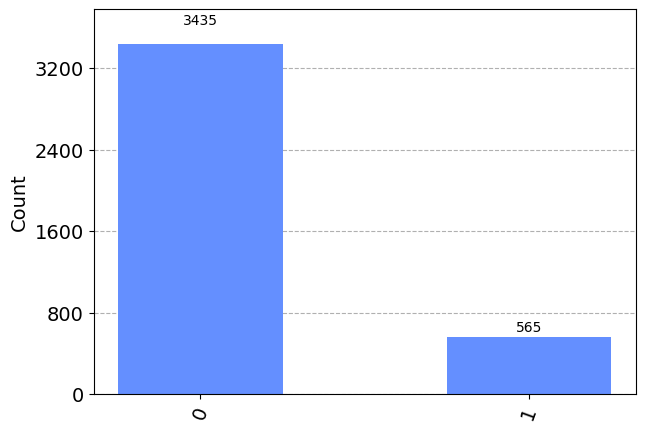

In [35]:
statistics = v.sample_counts(4000)
plot_histogram(statistics)